In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

In [2]:
path = '../data/processed_data/accept_downsampled_by_hardship.csv'

In [3]:
df1 = pd.read_csv(path)
del df1['Unnamed: 0']

In [4]:
df1 = df1.dropna()
df1 = df1.drop(columns='id')

In [61]:
temp = df1['hardship'].values.copy()

In [62]:
df1['hardship'] = temp

In [63]:
#split dataframe
y = df1['hardship']
col_lis = list(df1.columns)
col_lis.remove('hardship')
X = df1[col_lis]

In [64]:
#split trainset
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=150000)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.7, random_state=150000)

In [ ]:
#normalize the trainset
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns=X_train.columns)

### Train SVM Linear Kernel 

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [65]:

acc_scores = [] 
cs = np.arange(2,10,0.2)
SVMs = []
for i in cs:
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf', C=i, random_state=150000))
    clf.fit(X_train, y_train)
    SVMs.append(clf)
    scores = cross_val_score(clf, X, y, cv=10)
    acc_scores.append(scores.sum())

0.7196600342601133 0.6644707949055775
2.0 0.7226907365924364 0.6646903820816864
2.2 0.7247331664250889 0.6651295564339043
2.4000000000000004 0.7259190934246936 0.6651295564339043
2.6000000000000005 0.7292133350902622 0.6653491436100132
2.8000000000000007 0.7306628014231124 0.6646903820816864
3.000000000000001 0.7325734615891422 0.6649099692577953
3.200000000000001 0.7349453155883515 0.6668862538427756
3.4000000000000012 0.7369218605876927 0.6662274923144489
3.6000000000000014 0.7392937145869021 0.6664470794905577
3.8000000000000016 0.7405455264198182 0.6679841897233202
4.000000000000002 0.7427856107524048 0.6668862538427756
4.200000000000002 0.74495981025168 0.6673254281949934
4.400000000000002 0.7460798524179734 0.6690821256038647
4.600000000000002 0.7473316642508895 0.6703996486605183
4.8000000000000025 

In [ ]:
max_index = acc_scores.index(max(acc_scores))
# save
joblib.dump(SVMs[max_index], "/content/drive/My Drive/datathon/svm_best.pkl") 

# load
# clf2 = joblib.load("model.pkl")

In [5]:

clf2 = joblib.load("./svm_best.pkl")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using

Text(0.5, 0, 'Permutation Importance')

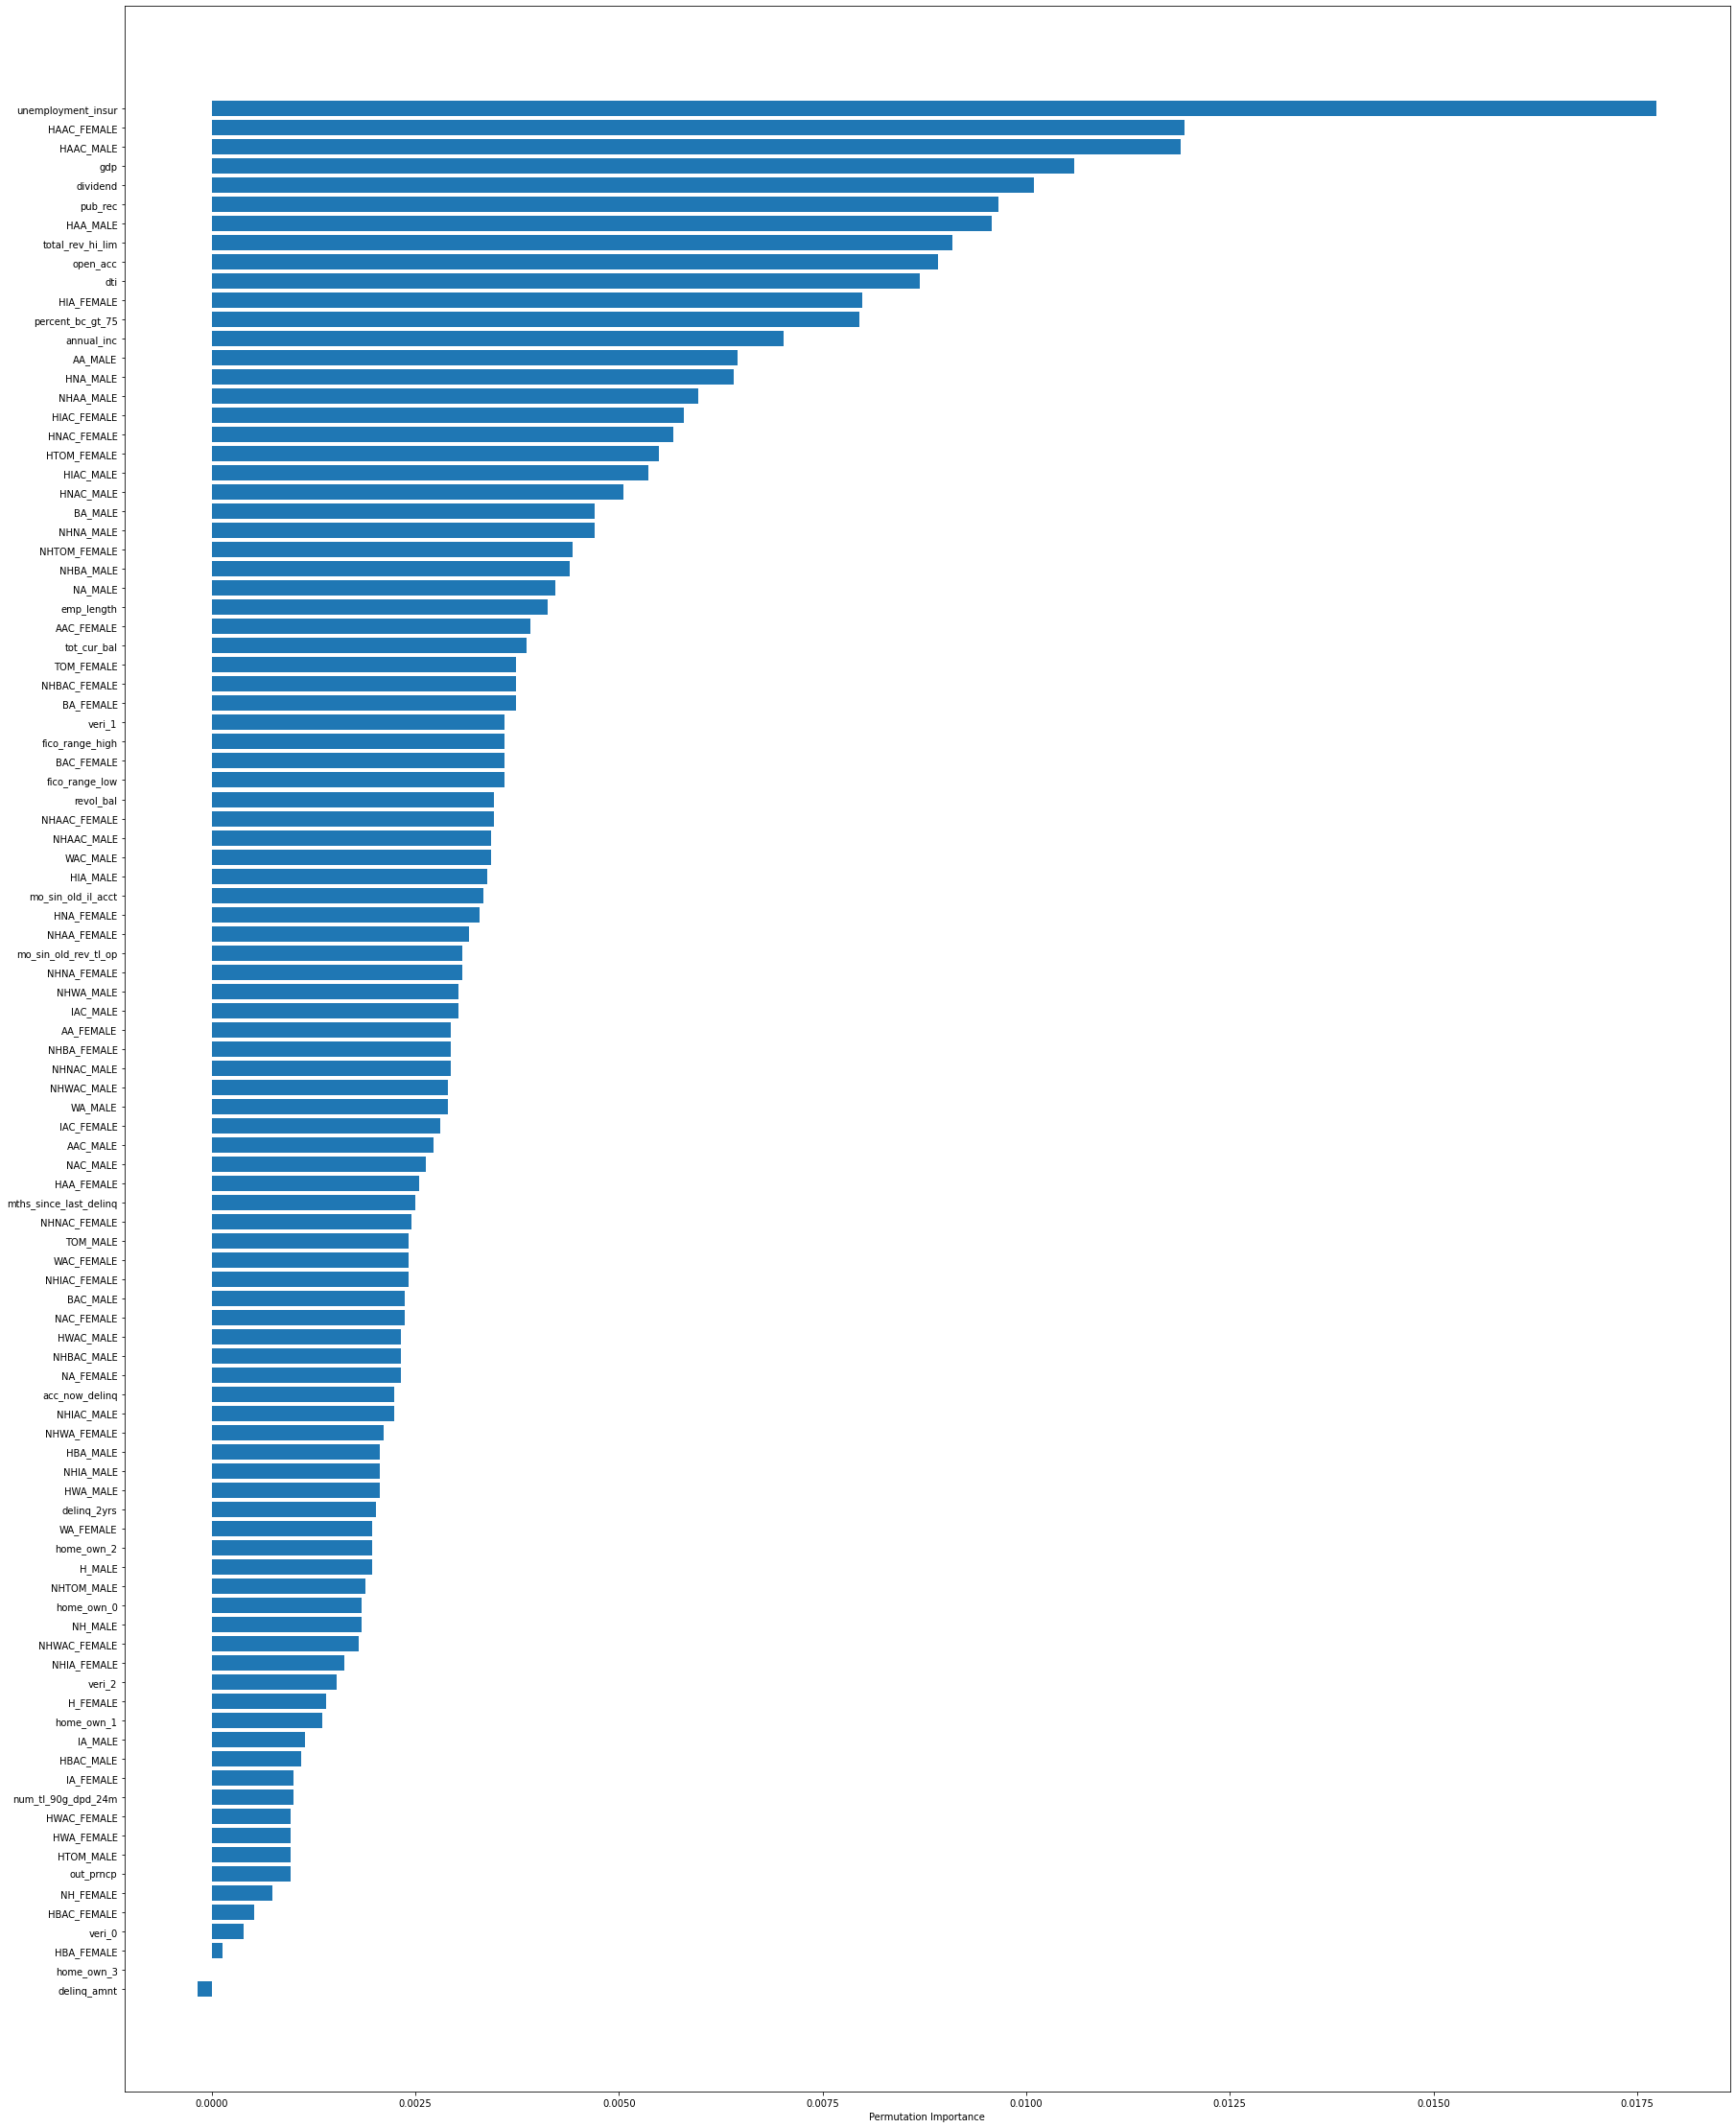

In [70]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=2)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(clf2, X_test, y_test, n_jobs = 10)
# perm_importance = result

feature_names = X_train.columns.values
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(30,40))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [6]:
df1_all = pd.read_csv('../data/processed_data/df1_one_hot.gz',compression='gzip', header=0, sep=',', quotechar='"')


In [8]:
df = df1_all.iloc[:,1:]


In [9]:
df = df[df['hardship'] == 0]

,revol_bal,out_prncp,tot_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,fico_range_low,fico_range_high,delinq_2yrs,mths_since_last_delinq,pub_rec,...,HNAC_FEMALE,id,hardship,veri_0,veri_1,veri_2,home_own_0,home_own_1,home_own_2,home_own_3
0,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.000896,68407277,0,0,1,0,1,0,0,0
1,2765.0,0.00,144904.0,148.0,128.0,675.0,679.0,0.0,30.0,0.0,...,0.000896,68407277,0,0,1,0,1,0,0,0
2,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.000000,68355089,0,0,1,0,1,0,0,0
3,21470.0,0.00,204396.0,113.0,192.0,715.0,719.0,1.0,6.0,0.0,...,0.000000,68355089,0,0,1,0,1,0,0,0
4,7869.0,0.00,189699.0,125.0,184.0,695.0,699.0,0.0,300.0,0.0,...,0.000217,68341763,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962717,8633.0,23252.59,28398.0,154.0,258.0,705.0,709.0,7.0,9.0,0.0,...,0.000958,88985880,0,0,0,1,1,0,0,0
3962718,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.000423,88224441,0,0,1,0,0,1,0,0
3962719,17641.0,0.00,62426.0,132.0,206.0,660.0,664.0,0.0,67.0,1.0,...,0.000423,88224441,0,0,1,0,0,1,0,0
3962720,7662.0,8456.12,143066.0,149.0,243.0,660.0,664.0,0.0,37.0,0.0,...,0.000531,88215728,0,0,0,1,1,0,0,0


In [15]:
del df['id']
del df['hardship']

In [21]:
y = [0 for i in range(10000)]
random_test = []

In [22]:
for i in range(10):
  X= df.sample(10000, random_state = i)
  score = clf2.score(X,y)
  print(score)
  random_test.append(score)



0.6674
0.6639
0.67
0.6643
0.675
0.6574
0.671
0.6681
0.6663
0.6701


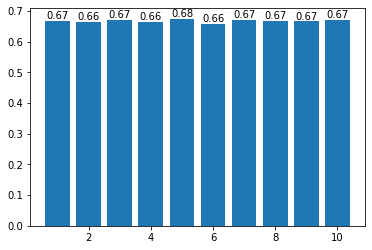

In [28]:
import matplotlib.pyplot as plt 
fig = plt.figure()
indexes = range(1, 11)
plt.bar(indexes, random_test)


for a,b in zip(indexes, random_test):   
  plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=10);
      
plt.show()